#  Preprocessing text, Tokenization, and Text Visualization.
This lab will ask you to a) perform a text cleaning on a sample dataset on the title of articles b) extract keywords in each class of article and c) visualize them in wordcloud and scatterText.

Here are the details of Sarcasm_Headlines_Dataset

*   is_sarcastic: class of article (0 = not sarcastic, 1 = sarcastic)
*   headline: title of the article (use this col/field to get keywords from)  
*   article_link: a URL link to the article's site.

Guide:

Step 1: read JSON file and put them into dataframe

Step 2: do text preprocessing by
- a) Remove all irrelevant characters such as any nonalphanumeric characters
- b) Tokenize your text by separating it into individual words
- c) Remove words that are not relevant, such as “@” twitter mentions, urls(if any)
- d) replace hashtag (#) with empty string.
- e) Convert all characters to lowercase(Case folding), in order to treat words such as “hello”, “Hello”, and “HELLO” the same. **
- f) perform lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)
- g) removing stopwords (such as a, an, the, be)etc.

Step 3: create 2 wordclouds (1 for each class) with Maxwords = 400
[How to generate wordcloud in python](https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/)


In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
import spacy
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt
from IPython.core.display import HTML

! gdown 1PkMqP1VMdY8YygwIVv9a5fqY5jYgJUEB
df = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)

classDict = {0:"not-sarcastic",1:"sarcastic"}
df["is_sarcastic"] = df["is_sarcastic"].apply(lambda x: classDict[x])

print(df)

nlp = spacy.load('en_core_web_sm')


Downloading...
From: https://drive.google.com/uc?id=1PkMqP1VMdY8YygwIVv9a5fqY5jYgJUEB
To: /content/Sarcasm_Headlines_Dataset.json
100% 422k/422k [00:00<00:00, 100MB/s]
       is_sarcastic                                           headline  \
0         sarcastic  thirtysomething scientists unveil doomsday clo...   
1     not-sarcastic  dem rep. totally nails why congress is falling...   
2     not-sarcastic  eat your veggies: 9 deliciously different recipes   
3         sarcastic  inclement weather prevents liar from getting t...   
4         sarcastic  mother comes pretty close to using word 'strea...   
...             ...                                                ...   
1995  not-sarcastic  a quick guide to this year's oscar best pictur...   
1996  not-sarcastic                          dr. krugman meets dr. fox   
1997      sarcastic              area mom raving about phoenix airport   
1998      sarcastic     seaworld to discontinue great white shark ride   
1999      sarcasti

100%|██████████| 2000/2000 [00:27<00:00, 73.20it/s] 

       is_sarcastic                                           headline  \
0         sarcastic  thirtysomething scientist unveil doomsday cloc...   
1     not-sarcastic  dem rep totally nail congress fall short gende...   
2     not-sarcastic          eat veggie 9 deliciously different recipe   
3         sarcastic            inclement weather prevent liar get work   
4         sarcastic     mother come pretty close word stream correctly   
...             ...                                                ...   
1995  not-sarcastic        quick guide year oscar good picture nominee   
1996  not-sarcastic                             dr krugman meet dr fox   
1997      sarcastic                      area mom rave phoenix airport   
1998      sarcastic        seaworld discontinue great white shark ride   
1999      sarcastic  3 day waiting period lead far feasible murder ...   

                                           article_link  
0     https://www.theonion.com/thirtysomething-scien.

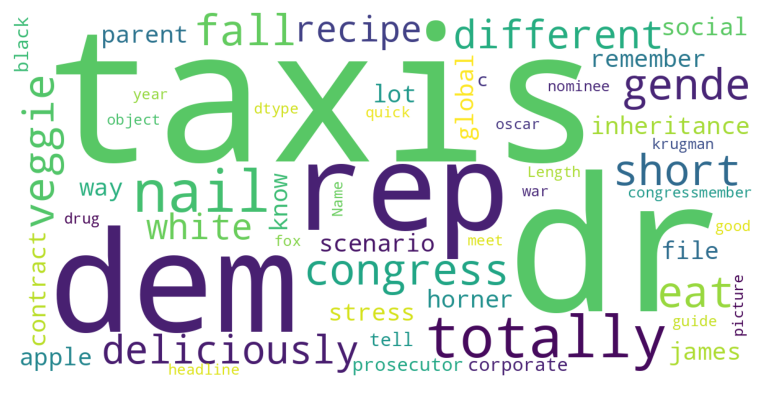

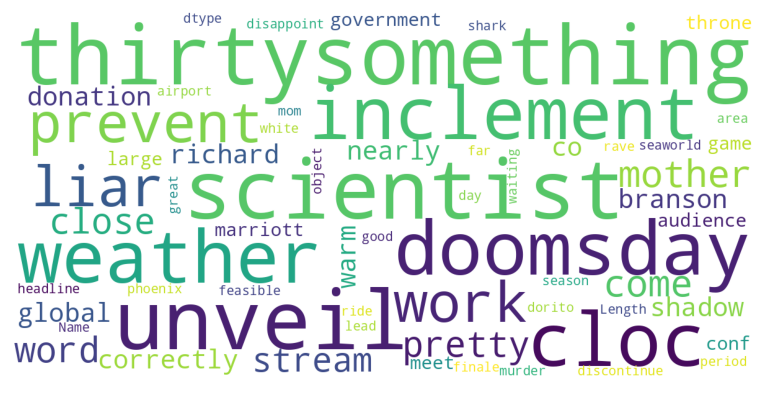